In [368]:
%matplotlib inline 

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 


In [369]:
from tensorflow.keras.datasets import mnist

In [370]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

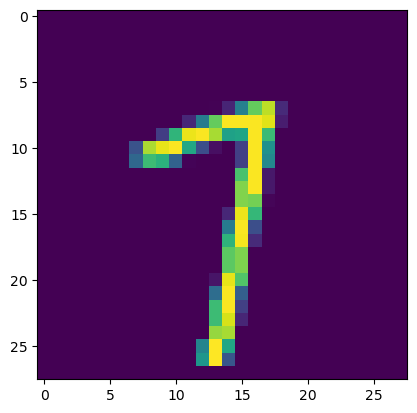

In [371]:
plt.imshow(X_train[42])

In [372]:
print(X_train.max())
print(X_train.min())

255
0


In [373]:
X_train = X_train/255
X_test = X_test/255

In [374]:
from tensorflow.keras.utils import to_categorical

In [375]:
y_cat_test = to_categorical(y_test, num_classes=10)
y_cat_train = to_categorical(y_train, num_classes=10)

In [376]:
X_train[0].max()

1.0

In [377]:
X_test[0].shape

(28, 28)

In [378]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten

In [379]:
# model = Sequential()

# model.add(Dense(128, activation="relu"))
# model.add(Dense(64, activation="relu"))

# model.add(Dense(10, activation="softmax"))

# model.compile(loss="sparse_categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
model = Sequential()
model.add(Flatten(input_shape = (28, 28)))

model.add(Dense(256, activation="relu", input_shape=(784, )))
model.add(Dense(128, activation="relu"))



model.add(Dense(10, activation="softmax"))

model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

In [380]:
from tensorflow.keras.callbacks import EarlyStopping

In [381]:
early_stop = EarlyStopping(monitor="val_loss", patience=1)

In [382]:
model.fit(X_train, y_cat_train, epochs=10, validation_data=(X_test, y_cat_test), callbacks=[early_stop])
# model.fit(X_train, y_train, epochs=100, validation_data=(X_test, y_test), callbacks=[early_stop])
# model.fit(X_train, y_cat_train, epochs=600)

Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2100 - accuracy: 0.9381 - val_loss: 0.1070 - val_accuracy: 0.9675
Epoch 2/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0866 - accuracy: 0.9732 - val_loss: 0.0818 - val_accuracy: 0.9738
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0602 - accuracy: 0.9816 - val_loss: 0.0784 - val_accuracy: 0.9770
Epoch 4/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0446 - accuracy: 0.9859 - val_loss: 0.0745 - val_accuracy: 0.9782
Epoch 5/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0344 - accuracy: 0.9894 - val_loss: 0.0720 - val_accuracy: 0.9797
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0286 - accuracy: 0.9906 - val_loss: 0.0805 - val_accuracy: 0.9802


In [383]:
metrics = pd.DataFrame(model.history.history)

<Axes: >

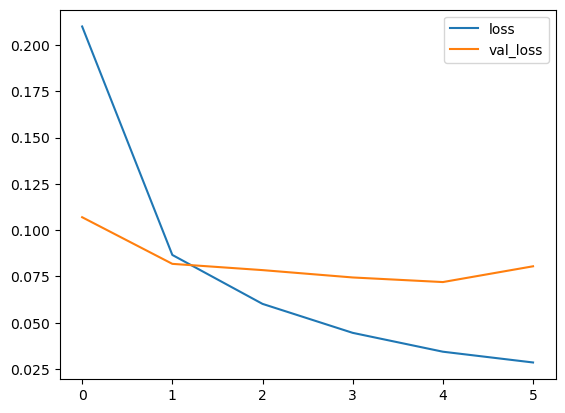

In [384]:
metrics[["loss", "val_loss"]].plot()

<Axes: >

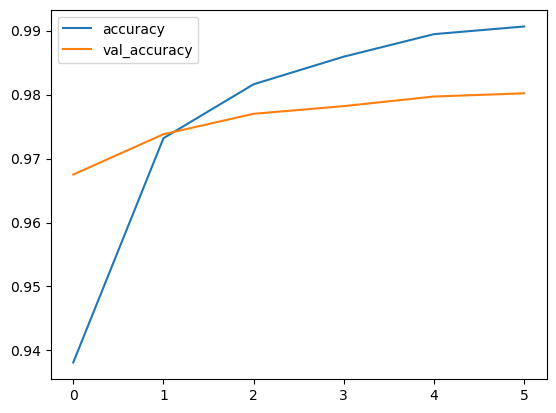

In [385]:
metrics[["accuracy", "val_accuracy"]].plot()

In [387]:
model.evaluate(X_test, y_cat_test, verbose=0)

[0.08050142973661423, 0.9801999926567078]

In [388]:
from sklearn.metrics import classification_report, confusion_matrix

In [389]:
predictions = np.argmax(model.predict(X_test), axis=1)

313/313 [==============================] - 0s 1ms/step


In [390]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       980
           1       0.99      0.99      0.99      1135
           2       0.98      0.98      0.98      1032
           3       0.96      0.98      0.97      1010
           4       0.99      0.98      0.98       982
           5       0.98      0.97      0.98       892
           6       0.98      0.98      0.98       958
           7       0.97      0.98      0.98      1028
           8       0.98      0.97      0.98       974
           9       0.98      0.97      0.97      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000



In [391]:
confusion_matrix(y_test, predictions)

array([[ 970,    0,    0,    1,    1,    1,    3,    1,    2,    1],
       [   0, 1123,    4,    0,    0,    0,    2,    4,    2,    0],
       [   1,    1, 1015,    7,    0,    0,    1,    4,    3,    0],
       [   1,    0,    3,  992,    0,    2,    0,    5,    3,    4],
       [   0,    0,    2,    1,  959,    0,    5,    3,    1,   11],
       [   2,    0,    0,   14,    1,  867,    3,    1,    2,    2],
       [   3,    3,    0,    1,    3,    7,  940,    0,    1,    0],
       [   2,    1,    5,    3,    1,    0,    0, 1011,    4,    1],
       [   4,    1,    4,    4,    3,    3,    3,    3,  946,    3],
       [   1,    2,    0,    5,    5,    3,    0,   12,    2,  979]])

In [394]:
X_test[42].shape

(28, 28)

In [393]:
np.argmax(model.predict(X_test[42]s), axis=1)

2023-04-03 23:58:31.624098: I tensorflow/core/common_runtime/executor.cc:1197] [/job:localhost/replica:0/task:0/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: Matrix size-incompatible: In[0]: [28,28], In[1]: [784,256]
	 [[{{node sequential_24/dense_57/Relu}}]]


InvalidArgumentError: Graph execution error:

Detected at node 'sequential_24/dense_57/Relu' defined at (most recent call last):
    File "<frozen runpy>", line 198, in _run_module_as_main
    File "<frozen runpy>", line 88, in _run_code
    File "/home/atiksh/miniconda3/envs/tensor/lib/python3.11/site-packages/ipykernel_launcher.py", line 17, in <module>
      app.launch_new_instance()
    File "/home/atiksh/miniconda3/envs/tensor/lib/python3.11/site-packages/traitlets/config/application.py", line 992, in launch_instance
      app.start()
    File "/home/atiksh/miniconda3/envs/tensor/lib/python3.11/site-packages/ipykernel/kernelapp.py", line 711, in start
      self.io_loop.start()
    File "/home/atiksh/miniconda3/envs/tensor/lib/python3.11/site-packages/tornado/platform/asyncio.py", line 215, in start
      self.asyncio_loop.run_forever()
    File "/home/atiksh/miniconda3/envs/tensor/lib/python3.11/asyncio/base_events.py", line 604, in run_forever
      self._run_once()
    File "/home/atiksh/miniconda3/envs/tensor/lib/python3.11/asyncio/base_events.py", line 1909, in _run_once
      handle._run()
    File "/home/atiksh/miniconda3/envs/tensor/lib/python3.11/asyncio/events.py", line 80, in _run
      self._context.run(self._callback, *self._args)
    File "/home/atiksh/miniconda3/envs/tensor/lib/python3.11/site-packages/ipykernel/kernelbase.py", line 510, in dispatch_queue
      await self.process_one()
    File "/home/atiksh/miniconda3/envs/tensor/lib/python3.11/site-packages/ipykernel/kernelbase.py", line 499, in process_one
      await dispatch(*args)
    File "/home/atiksh/miniconda3/envs/tensor/lib/python3.11/site-packages/ipykernel/kernelbase.py", line 406, in dispatch_shell
      await result
    File "/home/atiksh/miniconda3/envs/tensor/lib/python3.11/site-packages/ipykernel/kernelbase.py", line 729, in execute_request
      reply_content = await reply_content
    File "/home/atiksh/miniconda3/envs/tensor/lib/python3.11/site-packages/ipykernel/ipkernel.py", line 411, in do_execute
      res = shell.run_cell(
    File "/home/atiksh/miniconda3/envs/tensor/lib/python3.11/site-packages/ipykernel/zmqshell.py", line 531, in run_cell
      return super().run_cell(*args, **kwargs)
    File "/home/atiksh/miniconda3/envs/tensor/lib/python3.11/site-packages/IPython/core/interactiveshell.py", line 2961, in run_cell
      result = self._run_cell(
    File "/home/atiksh/miniconda3/envs/tensor/lib/python3.11/site-packages/IPython/core/interactiveshell.py", line 3016, in _run_cell
      result = runner(coro)
    File "/home/atiksh/miniconda3/envs/tensor/lib/python3.11/site-packages/IPython/core/async_helpers.py", line 129, in _pseudo_sync_runner
      coro.send(None)
    File "/home/atiksh/miniconda3/envs/tensor/lib/python3.11/site-packages/IPython/core/interactiveshell.py", line 3221, in run_cell_async
      has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
    File "/home/atiksh/miniconda3/envs/tensor/lib/python3.11/site-packages/IPython/core/interactiveshell.py", line 3400, in run_ast_nodes
      if await self.run_code(code, result, async_=asy):
    File "/home/atiksh/miniconda3/envs/tensor/lib/python3.11/site-packages/IPython/core/interactiveshell.py", line 3460, in run_code
      exec(code_obj, self.user_global_ns, self.user_ns)
    File "/tmp/ipykernel_13760/1722462847.py", line 1, in <module>
      np.argmax(model.predict(X_test[42]), axis=1)
    File "/home/atiksh/miniconda3/envs/tensor/lib/python3.11/site-packages/keras/utils/traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "/home/atiksh/miniconda3/envs/tensor/lib/python3.11/site-packages/keras/engine/training.py", line 2382, in predict
      tmp_batch_outputs = self.predict_function(iterator)
    File "/home/atiksh/miniconda3/envs/tensor/lib/python3.11/site-packages/keras/engine/training.py", line 2169, in predict_function
      return step_function(self, iterator)
    File "/home/atiksh/miniconda3/envs/tensor/lib/python3.11/site-packages/keras/engine/training.py", line 2155, in step_function
      outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/home/atiksh/miniconda3/envs/tensor/lib/python3.11/site-packages/keras/engine/training.py", line 2143, in run_step
      outputs = model.predict_step(data)
    File "/home/atiksh/miniconda3/envs/tensor/lib/python3.11/site-packages/keras/engine/training.py", line 2111, in predict_step
      return self(x, training=False)
    File "/home/atiksh/miniconda3/envs/tensor/lib/python3.11/site-packages/keras/utils/traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "/home/atiksh/miniconda3/envs/tensor/lib/python3.11/site-packages/keras/engine/training.py", line 558, in __call__
      return super().__call__(*args, **kwargs)
    File "/home/atiksh/miniconda3/envs/tensor/lib/python3.11/site-packages/keras/utils/traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "/home/atiksh/miniconda3/envs/tensor/lib/python3.11/site-packages/keras/engine/base_layer.py", line 1145, in __call__
      outputs = call_fn(inputs, *args, **kwargs)
    File "/home/atiksh/miniconda3/envs/tensor/lib/python3.11/site-packages/keras/utils/traceback_utils.py", line 96, in error_handler
      return fn(*args, **kwargs)
    File "/home/atiksh/miniconda3/envs/tensor/lib/python3.11/site-packages/keras/engine/sequential.py", line 412, in call
      return super().call(inputs, training=training, mask=mask)
    File "/home/atiksh/miniconda3/envs/tensor/lib/python3.11/site-packages/keras/engine/functional.py", line 512, in call
      return self._run_internal_graph(inputs, training=training, mask=mask)
    File "/home/atiksh/miniconda3/envs/tensor/lib/python3.11/site-packages/keras/engine/functional.py", line 669, in _run_internal_graph
      outputs = node.layer(*args, **kwargs)
    File "/home/atiksh/miniconda3/envs/tensor/lib/python3.11/site-packages/keras/utils/traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "/home/atiksh/miniconda3/envs/tensor/lib/python3.11/site-packages/keras/engine/base_layer.py", line 1145, in __call__
      outputs = call_fn(inputs, *args, **kwargs)
    File "/home/atiksh/miniconda3/envs/tensor/lib/python3.11/site-packages/keras/utils/traceback_utils.py", line 96, in error_handler
      return fn(*args, **kwargs)
    File "/home/atiksh/miniconda3/envs/tensor/lib/python3.11/site-packages/keras/layers/core/dense.py", line 255, in call
      outputs = self.activation(outputs)
    File "/home/atiksh/miniconda3/envs/tensor/lib/python3.11/site-packages/keras/activations.py", line 317, in relu
      return backend.relu(
    File "/home/atiksh/miniconda3/envs/tensor/lib/python3.11/site-packages/keras/backend.py", line 5396, in relu
      x = tf.nn.relu(x)
Node: 'sequential_24/dense_57/Relu'
Matrix size-incompatible: In[0]: [28,28], In[1]: [784,256]
	 [[{{node sequential_24/dense_57/Relu}}]] [Op:__inference_predict_function_139724]